# Fighting Novel Coronavirus COVID-19 with Data Science & Machine Learning.

*By: Ahmed A.Azeem (Biomedical Engineer), Cairo, Egypt.
email: eng.aa.azeem80@outlook.com*

## Abstract

In December 2019, A novel Coronavirus was found in a seafood wholesale market located in Wuhan, China., On 11 February 2020, WHO announced a name for the new coronavirus disease: COVID-19., And was recognised as a pandemic on 11 March 2020.

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) a virus closely related to the SARS virus., The disease was discovered and named during the 2019–20 coronavirus outbreak, Those affected may develop a fever, dry cough, fatigue, and shortness of breath. A sore throat, runny nose or sneezing is less common. While the majority of cases result in mild symptoms, some can progress to pneumonia and multi-organ failure.

For more information & sources of trusted data:

- https://en.wikipedia.org/wiki/Coronavirus_disease_2019
- https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- https://www.cdc.gov/coronavirus/2019-ncov/index.html
- https://www.ecdc.europa.eu/en/novel-coronavirus-china
- https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
- https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#### Methodology / Approach
CRISP-DM used as a data science methodology.

For more information:
- https://www.ibm.com/support/knowledgecenter/SS3RA7_15.0.0/com.ibm.spss.crispdm.help/crisp_overview.htm

- CRISP-DM consists of six iterative stages.

  1. **Business Understanding**: Focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan.
  
  2. **Data Understanding**: Starts with initial data collection and proceeds with activities to get familiar with the data, identify data quality problems, discover first insights into the data, or detect interesting subsets to form hypotheses for hidden information.
  
  3. **Data Preparation**: The data preparation phase covers all activities to construct the final data set from the initial raw data.
  
  4. **Modeling**: Modeling techniques are selected and applied. Because some techniques like neural networks (a type of a predictive model) have specific requirements regarding the form of the data, there can be a loop back to data preparation.
  
  5. **Evaluation**: After one or more models are built that appear to have high quality based on whatever we are trying to predict, they need to be tested to ensure that they work against unseen data and that all key business issues are sufficiently considered. The result is the selection of the champion model.
  
  6. **Deployment**: Generally, deployment means deploying a code representation of the model into an operating system to score or categorize new unseen data as it arises and create a mechanism for the use of that new information in the solution of the original business problem. Importantly, the code representation must include all the data preparation steps leading up to modeling so that the model treats new raw data in the same manner as during model development.

### Dataset Source

*European Centre for Disease Prevention and Control*

Situation update worldwide, as of 13 April 2020. (The data has been collected between 6:00 and 10:00 CET)

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
#last updated dataset
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-13.xlsx'

In [3]:
import urllib.request
urllib.request.urlretrieve (url, "covid_state_M.xlsx")

('covid_state_M.xlsx', <http.client.HTTPMessage at 0x7ffa7809e198>)

In [4]:
# Get data from European Centre for Disease Prevention and Control
covid_df = pd.read_excel('covid_state_M.xlsx')

In [5]:
#covid_df = pd.read_csv('ecdc_2703.csv',encoding='ISO-8859-1')

In [6]:
covid_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0


In [7]:
covid_df['dateRep'] = pd.to_datetime(covid_df['dateRep'], format='%d/%m/%Y')

In [8]:
covid_df.isna().sum()[covid_df.isna().sum()>0]

geoId                    30
countryterritoryCode    209
popData2018             168
dtype: int64

In [9]:
covid_df.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2018                       float64
dtype: object

In [10]:
covid_df.rename(columns={'dateRep': 'Date', 'countriesAndTerritories': 'Country', 'cases': 'Confirmed','deaths': 'Deaths'}, inplace=True)

In [11]:
covid_df.to_csv('updated.csv')

In [12]:
ndf = pd.read_csv('updated.csv',parse_dates=['Date'], index_col='Date')

In [13]:
ndf = ndf.drop(['Unnamed: 0', 'geoId', 'day', 'month', 'year', 'countryterritoryCode', 'popData2018'], axis=1)

In [14]:
ndf.head()

,Confirmed,Deaths,Country
Date,,,
2020-04-13,52,0,Afghanistan
2020-04-12,34,3,Afghanistan
2020-04-11,37,0,Afghanistan
2020-04-10,61,1,Afghanistan
2020-04-09,56,3,Afghanistan


In [15]:
#ndf.Country.unique()

In [16]:
# Rename Countries
ndf['Country']= ndf['Country'].str.replace('Antigua_and_Barbuda','Antigua & Barbuda')
ndf['Country']= ndf['Country'].str.replace('United_Kingdom', 'UK')
ndf['Country']= ndf['Country'].str.replace('United_States_of_America', 'US')
ndf['Country']= ndf['Country'].str.replace('United_Arab_Emirates', 'Emirates')
ndf['Country']= ndf['Country'].str.replace('Holy_See', 'Vatican')
ndf['Country']= ndf['Country'].str.replace('Bosnia_and_Herzegovina','Bosnia & Herzegovina')
ndf['Country']= ndf['Country'].str.replace('Brunei_Darussalam','Brunei')
ndf['Country']= ndf['Country'].str.replace('Burkina_Faso','Burkina Faso')
ndf['Country']= ndf['Country'].str.replace('CANADA','Canada')
ndf['Country']= ndf['Country'].str.replace('Cases_on_an_international_conveyance_Japan','The Diamond Princess')
ndf['Country']= ndf['Country'].str.replace('Central_African_Republic','Central African Rep.')
ndf['Country']= ndf['Country'].str.replace('Costa_Rica','Costa Rica')
ndf['Country']= ndf['Country'].str.replace("Cote_dIvoire","Cote d'ivoire")
ndf['Country']= ndf['Country'].str.replace('Czech_Republic','Czech Rep.')
ndf['Country']= ndf['Country'].str.replace('Democratic_Republic_of_the_Congo','Congo-Kinshasa')
ndf['Country']= ndf['Country'].str.replace('Equatorial_Guinea','Guinea')
ndf['Country']= ndf['Country'].str.replace('Eswatini','Eswatini-Swaziland')
ndf['Country']= ndf['Country'].str.replace('New_Zealand','New Zealand')
ndf['Country']= ndf['Country'].str.replace('North_Macedonia','Macedonia')
ndf['Country']= ndf['Country'].str.replace('Saint_Lucia','Saint Lucia')
ndf['Country']= ndf['Country'].str.replace('Saint_Vincent_and_the_Grenadines','Saint Vincent')
ndf['Country']= ndf['Country'].str.replace('San_Marino','San Marino')
ndf['Country']= ndf['Country'].str.replace('Saudi_Arabia','Saudi Arabia')
ndf['Country']= ndf['Country'].str.replace('South_Africa','South Africa')
ndf['Country']= ndf['Country'].str.replace('South_Korea','South Korea')
ndf['Country']= ndf['Country'].str.replace('Sri_Lanka','Sri Lanka')
ndf['Country']= ndf['Country'].str.replace('Trinidad_and_Tobago','Trinidad & Tobago')
ndf['Country']= ndf['Country'].str.replace('United_Republic_of_Tanzania','Tanzania')
ndf['Country']= ndf['Country'].str.replace('Dominican_Republic','Dominican Rep.')

In [17]:
#ndf.Country.duplicated()

In [18]:
#duplicateRows = ndf[ndf.duplicated()]
#print(duplicateRows)

In [19]:
# Select all duplicate rows based on one column
#duplicateRows = ndf[ndf.duplicated(['Country', 'Confirmed', 'Deaths'])]
#print("Duplicate Rows based on a 3 columns are:", duplicateRows, sep='\n')

In [20]:
ndf.head()

,Confirmed,Deaths,Country
Date,,,
2020-04-13,52,0,Afghanistan
2020-04-12,34,3,Afghanistan
2020-04-11,37,0,Afghanistan
2020-04-10,61,1,Afghanistan
2020-04-09,56,3,Afghanistan


In [21]:
deaths_by_country = ndf.groupby(['Country'])['Deaths'].sum().to_frame(name = 'Deaths').reset_index()
deaths_by_country.columns = ['Country','Deaths']
deaths_by_country.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_country.head(25)

,Country,Deaths
193,US,22108
96,Italy,19901
175,Spain,16972
68,France,14393
192,UK,10612
91,Iran,4474
18,Belgium,3600
41,China,3345
73,Germany,2799
134,Netherlands,2737


In [22]:
confirmed_by_country = ndf.groupby(['Country'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
confirmed_by_country.columns = ['Country','Confirmed']
confirmed_by_country.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_country.head(50)

,Country,Confirmed
193,US,557571
175,Spain,166019
96,Italy,156363
73,Germany,123016
68,France,95403
192,UK,84279
41,China,83209
91,Iran,71686
190,Turkey,56956
18,Belgium,29647


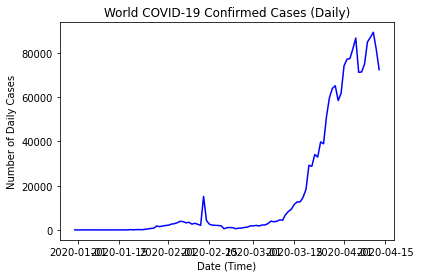

In [23]:
# Plot confirmed cases worldwide
cf = ndf.groupby('Date')[['Country','Confirmed']].sum()

plt.xlabel('Date (Time)')
plt.ylabel('Number of Daily Cases')
plt.title('World COVID-19 Confirmed Cases (Daily)')

plt.plot(cf, color='blue')

In [24]:
# Plot and save trendline graph
def create_trend_line(ndf, col3, col4):
    fig, ax = plt.subplots(figsize=(10,6))
    ndf.groupby(['Date'])[['Confirmed', 'Deaths']].sum().plot(ax=ax, marker='+')
    fig = ax.get_figure()

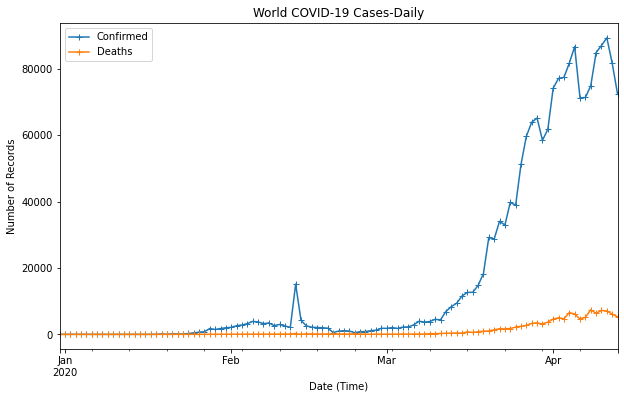

In [25]:
create_trend_line(ndf, 'Confirmed', 'Deaths')
plt.xlabel('Date (Time)')
plt.ylabel('Number of Records')
plt.title('World COVID-19 Cases-Daily')
plt.savefig('wcovid19daily')

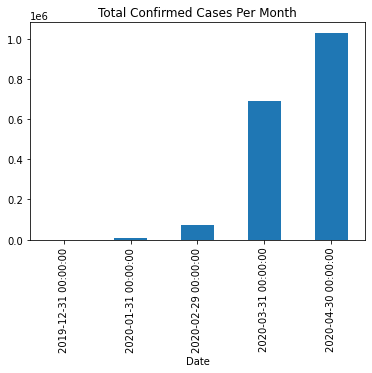

In [26]:
ndf['Confirmed'].resample('M').sum().plot(kind='bar', title='Total Confirmed Cases Per Month')

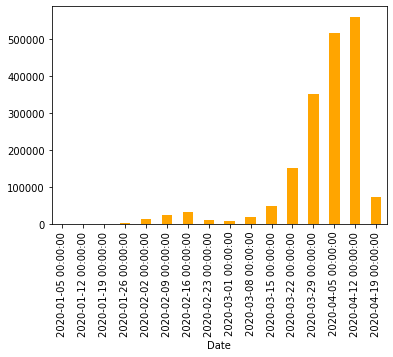

In [27]:
ndf['Confirmed'].resample('W').sum().plot(kind='bar', color='orange')

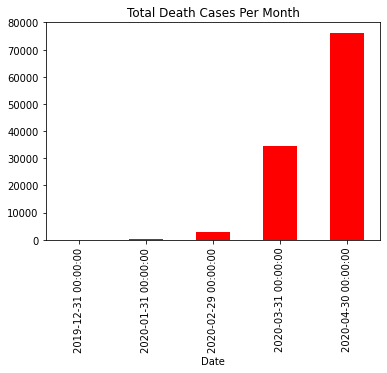

In [28]:
ndf['Deaths'].resample('M').sum().plot(kind='bar', color='red', title='Total Death Cases Per Month')

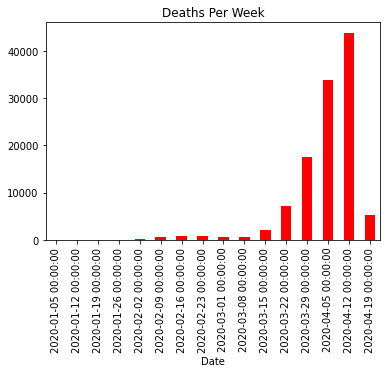

In [29]:
ndf['Deaths'].resample('W').sum().plot(kind='bar', color='red', title='Deaths Per Week')

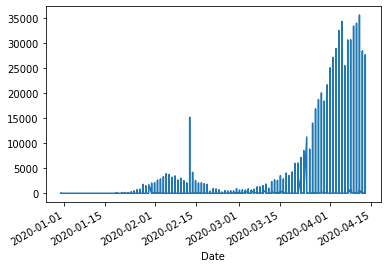

In [30]:
ndf['Confirmed'].plot()

In [31]:
ndf.head()

,Confirmed,Deaths,Country
Date,,,
2020-04-13,52,0,Afghanistan
2020-04-12,34,3,Afghanistan
2020-04-11,37,0,Afghanistan
2020-04-10,61,1,Afghanistan
2020-04-09,56,3,Afghanistan


In [32]:
con_cases = ndf['Confirmed'].sum()
dt_cases = ndf['Deaths'].sum()

In [33]:
fatality_rate = dt_cases/(con_cases+dt_cases)*100

In [34]:
fatality_rate

5.9096084434728695

In [35]:
dt_cases

113513

In [36]:
con_cases

1807308

In [37]:
# visualization of most infected countries in the world

# CHINA STATE
df_cn = ndf[ndf['Country']=='China'].reset_index()
# ITALY STATE               
df_it = ndf[ndf['Country']=='Italy'].reset_index()
# IRAN STATE
df_ir = ndf[ndf['Country']=='Iran'].reset_index()
# SPAIN STATE
df_sp = ndf[ndf['Country']=='Spain'].reset_index()
# FRANCE STATE
df_fr = ndf[ndf['Country']=='France'].reset_index()
# SOUTH KOREA STATE
df_skr = ndf[ndf['Country']=='South Korea'].reset_index()

# filter down on dates
df_cn  = df_cn[df_cn['Date'] >= ('2020-01-17')]
df_it = df_it[df_it['Date'] >= ('2020-01-17')]
df_ir = df_ir[df_ir['Date'] >= ('2020-01-17')]
df_sp = df_sp[df_sp['Date'] >= ('2020-01-17')]
df_fr = df_fr[df_fr['Date'] >= ('2020-01-17')]
df_skr = df_skr[df_skr['Date'] >= ('2020-01-17')]

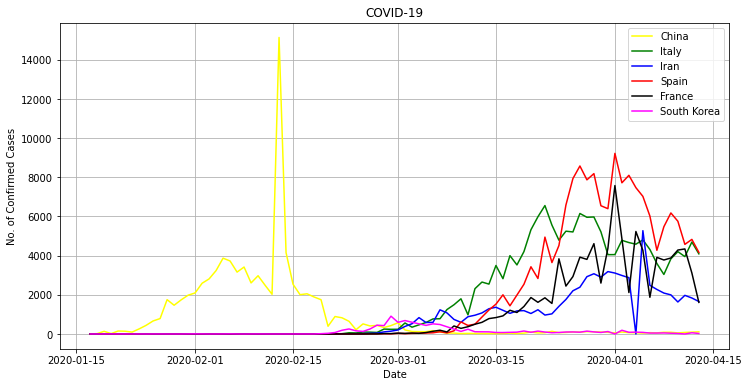

In [38]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Confirmed'],color='yellow')
ax.plot(df_it['Date'], df_it['Confirmed'],color='green')
ax.plot(df_ir['Date'], df_ir['Confirmed'],color='blue')
ax.plot(df_sp['Date'], df_sp['Confirmed'],color='red')
ax.plot(df_fr['Date'], df_fr['Confirmed'],color='black')
ax.plot(df_skr['Date'], df_skr['Confirmed'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()
plt.savefig('covidstate1')

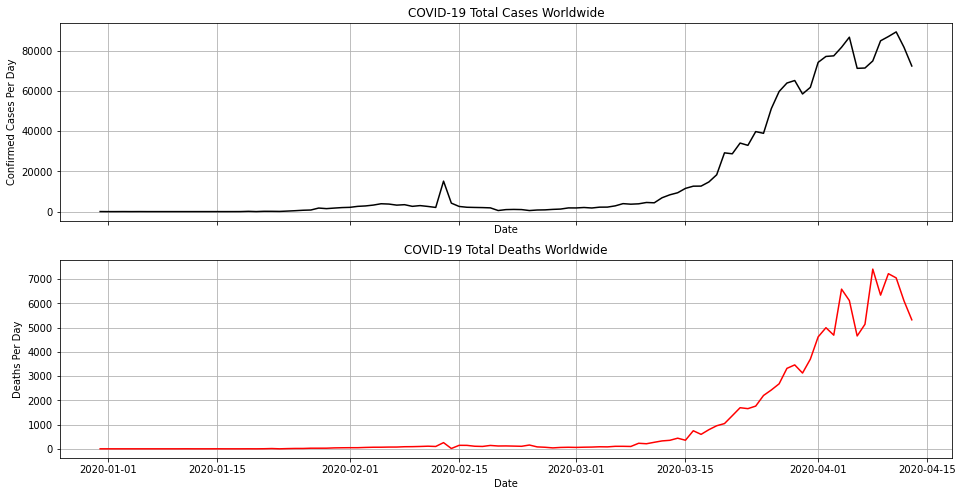

In [39]:
wdf = ndf.groupby(['Date'])[['Confirmed','Deaths']].sum().reset_index()

#plotting new cases by day worldwide
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots(2,sharex=True)

# top chart of cases
ax[0].plot(wdf['Date'], wdf['Confirmed'],color='black')
ax[0].set(xlabel='Date', ylabel='Confirmed Cases Per Day',
       title='COVID-19 Total Cases Worldwide')
ax[0].grid()

# bottom chart of deaths
ax[1].plot(wdf['Date'], wdf['Deaths'],color='red')
ax[1].set(xlabel='Date', ylabel='Deaths Per Day',
       title='COVID-19 Total Deaths Worldwide')
ax[1].grid()

In [40]:
ndf.Confirmed.sum()

1807308

In [41]:
ndf.Deaths.sum()

113513

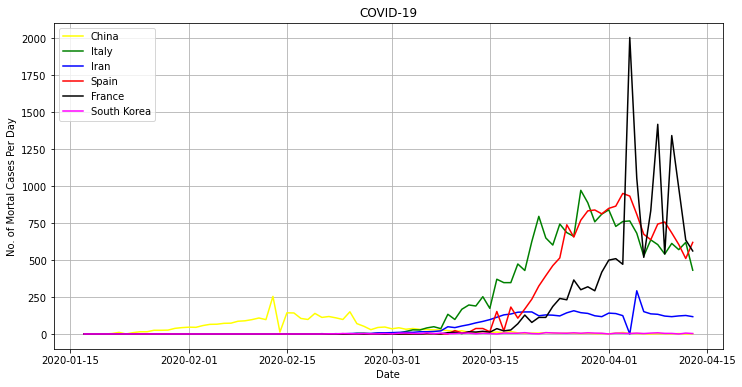

In [42]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Deaths'],color='yellow')
ax.plot(df_it['Date'], df_it['Deaths'],color='green')
ax.plot(df_ir['Date'], df_ir['Deaths'],color='blue')
ax.plot(df_sp['Date'], df_sp['Deaths'],color='red')
ax.plot(df_fr['Date'], df_fr['Deaths'],color='black')
ax.plot(df_skr['Date'], df_skr['Deaths'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Mortal Cases Per Day',
       title='COVID-19')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()

In [43]:
ndf.head()

,Confirmed,Deaths,Country
Date,,,
2020-04-13,52,0,Afghanistan
2020-04-12,34,3,Afghanistan
2020-04-11,37,0,Afghanistan
2020-04-10,61,1,Afghanistan
2020-04-09,56,3,Afghanistan


In [44]:
# Calculate Italy mortality rate
df_it
itcon = df_it['Confirmed'].sum()
itdt = df_it['Deaths'].sum()
it_mort_rate = itdt/(itcon+itdt)*100

In [45]:
it_mort_rate

11.290450687604956

In [46]:
# Italy mortality rate Compared to World Average
itw = (it_mort_rate/fatality_rate) * 100

In [47]:
print('Italy Mortality Rate Compared to World Average is :', itw ,'%')

Italy Mortality Rate Compared to World Average is : 191.05243258671726 %


In [48]:
# Calculate China mortality rate
df_cn
chcon = df_cn['Confirmed'].sum()
chdt = df_cn['Deaths'].sum()
ch_mort_rate = chdt/(chcon+chdt)*100

In [49]:
ch_mort_rate

3.865052663221301

In [50]:
# China Mortality rate compared to World Average
chw = (ch_mort_rate/fatality_rate) * 100

In [51]:
print('China Mortality Rate Compared to World Average is :', chw ,'%')

China Mortality Rate Compared to World Average is : 65.40285537005808 %


In [52]:
# Calculate Spain mortality rate
df_sp
spcon = df_sp['Confirmed'].sum()
spdt = df_sp['Deaths'].sum()
sp_mort_rate = spdt/(spcon+spdt)*100

In [53]:
sp_mort_rate

9.27477307627151

In [54]:
# Spain Mortality rate compared to World Average
spw = (sp_mort_rate/fatality_rate) * 100

In [55]:
print('Spain Mortality Rate Compared to World Average is :', spw ,'%')

Spain Mortality Rate Compared to World Average is : 156.94395263218237 %


In [56]:
# Calculate France mortality rate
df_fr
frcon = df_fr['Confirmed'].sum()
frdt = df_fr['Deaths'].sum()
fr_mort_rate = frdt/(frcon+frdt)*100

In [57]:
fr_mort_rate

13.108856424642063

In [58]:
# France Mortality rate compared to World Average
frw = (fr_mort_rate/fatality_rate) * 100

In [59]:
print('France Mortality Rate Compared to World Average is :', frw ,'%')

France Mortality Rate Compared to World Average is : 221.82275780251945 %


In [60]:
# Calculate Iran mortality rate
df_ir
ircon = df_ir['Confirmed'].sum()
irdt = df_ir['Deaths'].sum()
ir_mort_rate = irdt/(ircon+irdt)*100

In [61]:
ir_mort_rate

5.874474789915967

In [62]:
# Iran Mortality rate compared to World Average
irw = (ir_mort_rate/fatality_rate) * 100

In [63]:
print('Iran Mortality Rate Compared to World Average is :', irw ,'%')

Iran Mortality Rate Compared to World Average is : 99.40548254773617 %


In [64]:
# visualization of most infected countries in the world part 2

# Germany STATE
df_gr = ndf[ndf['Country']=='Germany'].reset_index()
# USA STATE               
df_us = ndf[ndf['Country']=='US'].reset_index()
# UK STATE
df_uk = ndf[ndf['Country']=='UK'].reset_index()
# NL STATE
df_nl = ndf[ndf['Country']=='Netherlands'].reset_index()
# SWISS STATE
df_sw = ndf[ndf['Country']=='Switzerland'].reset_index()
# Japan STATE
df_jp = ndf[ndf['Country']=='Japan'].reset_index()

# filter down on dates
df_gr  = df_gr[df_gr['Date'] >= ('2020-01-17')]
df_us = df_us[df_us['Date'] >= ('2020-01-17')]
df_uk = df_uk[df_uk['Date'] >= ('2020-01-17')]
df_nl = df_nl[df_nl['Date'] >= ('2020-01-17')]
df_sw = df_sw[df_sw['Date'] >= ('2020-01-17')]
df_jp = df_jp[df_jp['Date'] >= ('2020-01-17')]

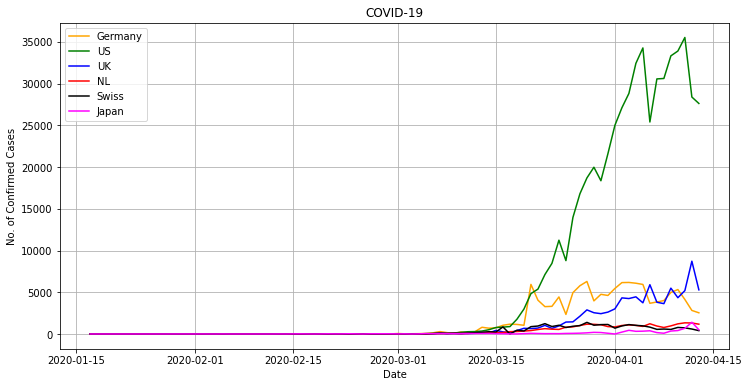

In [65]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Confirmed'],color='orange')
ax.plot(df_us['Date'], df_us['Confirmed'],color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'],color='blue')
ax.plot(df_nl['Date'], df_nl['Confirmed'],color='red')
ax.plot(df_sw['Date'], df_sw['Confirmed'],color='black')
ax.plot(df_jp['Date'], df_jp['Confirmed'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()
plt.savefig('covidstate2')

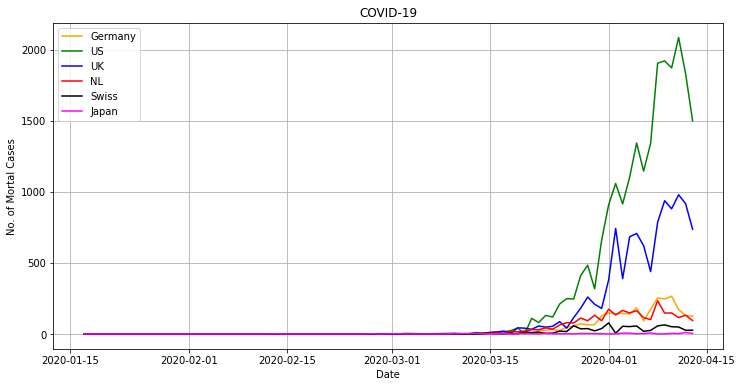

In [66]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Deaths'],color='orange')
ax.plot(df_us['Date'], df_us['Deaths'],color='green')
ax.plot(df_uk['Date'], df_uk['Deaths'],color='blue')
ax.plot(df_nl['Date'], df_nl['Deaths'],color='red')
ax.plot(df_sw['Date'], df_sw['Deaths'],color='black')
ax.plot(df_jp['Date'], df_jp['Deaths'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Mortal Cases',
       title='COVID-19')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()

In [67]:
# visualization of some infected countries in the world part 3

# Egypt STATE
df_eg = ndf[ndf['Country']=='Egypt'].reset_index()
# Israel STATE               
df_il = ndf[ndf['Country']=='Israel'].reset_index()
# Turkey STATE
df_tr = ndf[ndf['Country']=='Turkey'].reset_index()
# Iraq STATE
df_iq = ndf[ndf['Country']=='Iraq'].reset_index()
# Qatar STATE
df_qr = ndf[ndf['Country']=='Qatar'].reset_index()
# Bahrain STATE
df_bn = ndf[ndf['Country']=='Bahrain'].reset_index()

# filter down on dates
df_eg  = df_eg[df_eg['Date'] >= ('2020-01-17')]
df_il = df_il[df_il['Date'] >= ('2020-01-17')]
df_tr = df_tr[df_tr['Date'] >= ('2020-01-17')]
df_iq = df_iq[df_iq['Date'] >= ('2020-01-17')]
df_qr = df_qr[df_qr['Date'] >= ('2020-01-17')]
df_bn = df_bn[df_bn['Date'] >= ('2020-01-17')]

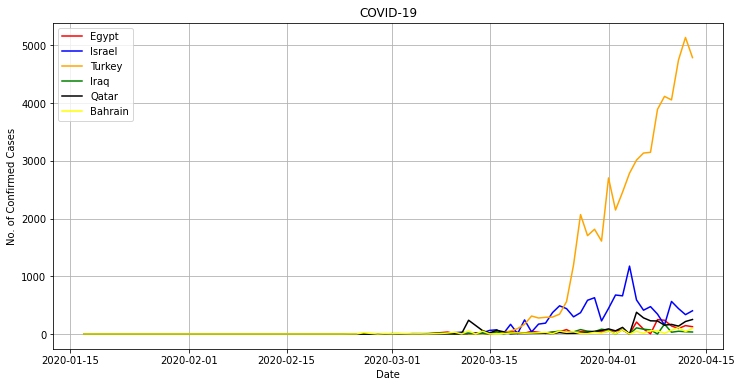

In [68]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_eg['Date'], df_eg['Confirmed'],color='red')
ax.plot(df_il['Date'], df_il['Confirmed'],color='blue')
ax.plot(df_tr['Date'], df_tr['Confirmed'],color='orange')
ax.plot(df_iq['Date'], df_iq['Confirmed'],color='green')
ax.plot(df_qr['Date'], df_qr['Confirmed'],color='black')
ax.plot(df_bn['Date'], df_bn['Confirmed'],color='yellow')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19')
ax.legend(['Egypt','Israel','Turkey','Iraq','Qatar','Bahrain'])
ax.grid()
plt.savefig('covidstate3')

In [69]:
twc = ndf.Confirmed.sum()
twd = ndf.Deaths.sum()

In [70]:
# South Africa STATE
df_sa = ndf[ndf['Country']=='South Africa'].reset_index()
# KSA STATE               
df_ksa = ndf[ndf['Country']=='Saudi Arabia'].reset_index()
# India STATE
df_in = ndf[ndf['Country']=='India'].reset_index()
# Russia STATE
df_ru = ndf[ndf['Country']=='Russia'].reset_index()
# Norway STATE
df_no = ndf[ndf['Country']=='Norway'].reset_index()
# Australia STATE
df_au = ndf[ndf['Country']=='Australia'].reset_index()
# Pakistan STATE
df_pk = ndf[ndf['Country']=='Pakistan'].reset_index()
# Indonesia STATE
df_inesia = ndf[ndf['Country']=='Indonesia'].reset_index()
# Brazil STATE
df_br = ndf[ndf['Country']=='Brazil'].reset_index()
# Sweden STATE
df_swd = ndf[ndf['Country']=='Sweden'].reset_index()


# filter down on dates
df_sa  = df_sa[df_sa['Date'] >= ('2020-01-17')]
df_ksa = df_ksa[df_ksa['Date'] >= ('2020-01-17')]
df_in = df_in[df_in['Date'] >= ('2020-01-17')]
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]
df_no = df_no[df_no['Date'] >= ('2020-01-17')]
df_au = df_au[df_au['Date'] >= ('2020-01-17')]
df_pk = df_pk[df_pk['Date'] >= ('2020-01-17')]
df_inesia = df_inesia[df_inesia['Date'] >= ('2020-01-17')]
df_br = df_br[df_br['Date'] >= ('2020-01-17')]
df_swd = df_swd[df_swd['Date'] >= ('2020-01-17')]

In [71]:
#Germany

df_gr
grcon = df_gr['Confirmed'].sum()
grdt = df_gr['Deaths'].sum()
gr_mort_rate = grdt/(grcon+grdt)*100

In [72]:
#US

df_us
uscon = df_us['Confirmed'].sum()
usdt = df_us['Deaths'].sum()
us_mort_rate = usdt/(uscon+usdt)*100

In [73]:
#UK

df_uk
ukcon = df_uk['Confirmed'].sum()
ukdt = df_uk['Deaths'].sum()
uk_mort_rate = ukdt/(ukcon+ukdt)*100

In [74]:
#Netherlands

df_nl
nlcon = df_nl['Confirmed'].sum()
nldt = df_nl['Deaths'].sum()
nl_mort_rate = nldt/(nlcon+nldt)*100

In [75]:
#Swiss

df_sw
swcon = df_sw['Confirmed'].sum()
swdt = df_sw['Deaths'].sum()
sw_mort_rate = swdt/(swcon+swdt)*100

In [76]:
#South Korea

df_skr
skrcon = df_skr['Confirmed'].sum()
skrdt = df_skr['Deaths'].sum()
skr_mort_rate = skrdt/(skrcon+skrdt)*100

In [77]:
#Japan

df_jp
jpcon = df_jp['Confirmed'].sum()
jpdt = df_jp['Deaths'].sum()
jp_mort_rate = jpdt/(jpcon+jpdt)*100

In [78]:
#Egypt

df_eg
egcon = df_eg['Confirmed'].sum()
egdt = df_eg['Deaths'].sum()
eg_mort_rate = egdt/(egcon+egdt)*100

In [79]:
#Israel

df_il
ilcon = df_il['Confirmed'].sum()
ildt = df_il['Deaths'].sum()
il_mort_rate = ildt/(ilcon+ildt)*100

In [80]:
#Iraq

df_iq
iqcon = df_iq['Confirmed'].sum()
iqdt = df_iq['Deaths'].sum()
iq_mort_rate = iqdt/(iqcon+iqdt)*100

In [81]:
#Turkey

df_tr
trcon = df_tr['Confirmed'].sum()
trdt = df_tr['Deaths'].sum()
tr_mort_rate = trdt/(trcon+trdt)*100

In [82]:
#Qatar

df_qr
qrcon = df_qr['Confirmed'].sum()
qrdt = df_qr['Deaths'].sum()
qr_mort_rate = qrdt/(qrcon+qrdt)*100

In [83]:
#Bahrain

df_bn
bncon = df_bn['Confirmed'].sum()
bndt = df_bn['Deaths'].sum()
bn_mort_rate = bndt/(bncon+bndt)*100

In [84]:
#South Africa

df_sa
sacon = df_sa['Confirmed'].sum()
sadt = df_sa['Deaths'].sum()
sa_mort_rate = sadt/(sacon+sadt)*100

In [85]:
#India

df_in
incon = df_in['Confirmed'].sum()
indt = df_in['Deaths'].sum()
in_mort_rate = indt/(incon+indt)*100

In [86]:
#Pakistan

df_pk
pkcon = df_pk['Confirmed'].sum()
pkdt = df_pk['Deaths'].sum()
pk_mort_rate = pkdt/(pkcon+pkdt)*100

In [87]:
#Russia

df_ru
rucon = df_ru['Confirmed'].sum()
rudt = df_ru['Deaths'].sum()
ru_mort_rate = rudt/(rucon+rudt)*100

In [88]:
# Norway

df_no
nocon = df_no['Confirmed'].sum()
nodt = df_no['Deaths'].sum()
no_mort_rate = nodt/(nocon+nodt)*100

In [89]:
# KSA

df_ksa
ksacon = df_ksa['Confirmed'].sum()
ksadt = df_ksa['Deaths'].sum()
ksa_mort_rate = ksadt/(ksacon+ksadt)*100

In [90]:
# Australia

df_au
aucon = df_au['Confirmed'].sum()
audt = df_au['Deaths'].sum()
au_mort_rate = audt/(aucon+audt)*100

In [91]:
# Indonesia

df_inesia
inesiacon = df_inesia['Confirmed'].sum()
inesiadt = df_inesia['Deaths'].sum()
inesia_mort_rate = inesiadt/(inesiacon+inesiadt)*100

In [92]:
# Brazil

df_br
brcon = df_br['Confirmed'].sum()
brdt = df_br['Deaths'].sum()
br_mort_rate = brdt/(brcon+brdt)*100

In [93]:
# Sweden
df_swd
swdcon = df_swd['Confirmed'].sum()
swddt = df_swd['Deaths'].sum()
swd_mort_rate = swddt/(swdcon+swddt)*100

In [94]:
data = {'Confirmed Cases Worldwide':twc,'Death Cases Worldwide':twd,'World Fatality_rate %':fatality_rate, 
       'China Confirmed Cases':chcon, 'China Death Cases':chdt, 'China Fatality Rate %':ch_mort_rate,
       'Italy Confirmed Cases':itcon, 'Italy Death Cases':itdt, 'Italy Fatality Rate %':it_mort_rate,
       'Spain Confirmed Cases':spcon, 'Spain Death Cases':spdt, 'Spain Fatality Rate %': sp_mort_rate,
       'France Confirmed Cases':frcon, 'France Death Cases':frdt, 'France Fatality Rate %':fr_mort_rate,
       'Iran Confirmed Cases':ircon, 'Iran Death Cases':irdt, 'Iran Fatality Rate %':ir_mort_rate,
       'Germany Confirmed Cases':grcon, 'Germany Death Cases':grdt, 'Germany Fatality Rate %':gr_mort_rate,
       'US Confirmed Cases':uscon, 'US Death Cases':usdt, 'US Fatality Rate %':us_mort_rate,
       'UK Confirmed Cases':ukcon, 'UK Death Cases':ukdt, 'UK Fatality Rate %':uk_mort_rate,
       'Netherlands (Holland) Confirmed Cases':nlcon, 'Netherlands (Holland) Death Cases':nldt, 'Netherlands (Holland) Fatality Rate %':nl_mort_rate,
       'Swiss Confirmed Cases':swcon, 'Swiss Death Cases':swdt, 'Swiss Fatality Rate %':sw_mort_rate,
       'Norway Confirmed Cases':nocon, 'Norway Death Cases':nodt, 'Norway Fatality Rate %':no_mort_rate,
       'Sweden Confirmed Cases':swdcon, 'Sweden Death Cases':swddt, 'Sweden Fatality Rate %':swd_mort_rate,
       'South Korea Confirmed Cases':skrcon, 'South Korea Death Cases':skrdt, 'South Korea Fatality Rate %':skr_mort_rate,
       'Japan Confirmed Cases':jpcon, 'Japan Death Cases':jpdt, 'Japan Fatality Rate %':jp_mort_rate,
       'Russia Confirmed Cases':rucon, 'Russia Death Cases':rudt, 'Russia Fatality Rate %':ru_mort_rate,
       'Israel Confirmed Cases':ilcon, 'Israel Death Cases':ildt, 'Israel Fatality Rate %':il_mort_rate,
       'Iraq Confirmed Cases':iqcon, 'Iraq Death Cases':iqdt, 'Iraq Fatality Rate %':iq_mort_rate,
       'Turkey Confirmed Cases':trcon, 'Turkey Death Cases':trdt, 'Turkey Fatality Rate %':tr_mort_rate,
       'Qatar Confirmed Cases':qrcon, 'Qatar Death Cases':qrdt, 'Qatar Fatality Rate %':qr_mort_rate,
       'Saudi Arabia Confirmed Cases':ksacon, 'Saudi Arabia Death Cases':ksadt, 'Saudi Arabia Fatality Rate %': ksa_mort_rate,
       'Egypt Confirmed Cases':egcon, 'Egypt Death Cases':egdt, 'Egypt Fatality Rate %':eg_mort_rate,
       'South Africa Confirmed Cases':sacon, 'South Africa Death Cases':sadt, 'South Africa Fatality Rate %':sa_mort_rate,
       'India Confirmed Cases':incon, 'India Death Cases':indt, 'India Fatality Rate %': in_mort_rate,
       'Pakistan Confirmed Cases':pkcon, 'Pakistan Death Cases':pkdt, 'Pakistan Fatality Rate %': pk_mort_rate,
       'Australia Confirmed Cases':aucon, 'Australia Death Cases':audt, 'Australia Fatality Rate %': au_mort_rate,
       'Indonesia Confirmed Cases':inesiacon, 'Indonesia Death Cases':inesiadt, 'Indonesia Fatality Rate %': inesia_mort_rate,
       'Brazil Confirmed Cases':brcon, 'Brazil Death Cases':brdt, 'Brazil Fatality Rate %': br_mort_rate,
       }

data = pd.DataFrame.from_dict(data, orient='index' ,columns=['Total Count or Rate'])
data.style.background_gradient(cmap='PuBu')

,Total Count or Rate
Confirmed Cases Worldwide,1807308.000000
Death Cases Worldwide,113513.000000
World Fatality_rate %,5.909608
China Confirmed Cases,83150.000000
China Death Cases,3343.000000
China Fatality Rate %,3.865053
Italy Confirmed Cases,156363.000000
Italy Death Cases,19901.000000
Italy Fatality Rate %,11.290451
Spain Confirmed Cases,166019.000000


In [95]:
df_per_day = ndf.groupby('Date')[['Confirmed','Deaths']].sum()

In [96]:
df_per_day.head()

,Confirmed,Deaths
Date,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


In [97]:
df_per_day.tail()

,Confirmed,Deaths
Date,,
2020-04-09,84930,6339
2020-04-10,87039,7223
2020-04-11,89349,7049
2020-04-12,81707,6104
2020-04-13,72395,5321


In [98]:
# Max. No. of confirmed cases per day
df_per_day['Confirmed'].max()

89349

In [99]:
# Date of Max. No. of confirmed cases
df_per_day['Confirmed'].idxmax()

Timestamp('2020-04-11 00:00:00')

In [100]:
# Min. No. of confirmed cases per day
df_per_day['Confirmed'].min()

0

In [101]:
# Date of Min. No. of confirmed cases
df_per_day['Confirmed'].idxmin()

Timestamp('2020-01-01 00:00:00')

In [102]:
# Max. No. of death cases per day
df_per_day['Deaths'].max()

7412

In [103]:
# Date of Max. No. of death cases
df_per_day['Deaths'].idxmax()

Timestamp('2020-04-08 00:00:00')

In [104]:
# Min. No. of death cases per day
df_per_day['Deaths'].min()

0

In [105]:
# Date of Min. No. of death cases
df_per_day['Deaths'].idxmin()

Timestamp('2019-12-31 00:00:00')

In [106]:
ndf['Country'].value_counts()

Sweden                         105
Australia                      105
Czechia                        105
Iceland                        105
US                             105
                              ... 
Malawi                          11
Falkland_Islands_(Malvinas)     10
South_Sudan                      8
Sao_Tome_and_Principe            5
Yemen                            4
Name: Country, Length: 205, dtype: int64

In [107]:
len(ndf['Country'].unique())

205

In [108]:
ndf.loc['2020-01'][['Confirmed','Deaths']].sum()

Confirmed    9799
Deaths        213
dtype: int64

In [109]:
ndf.loc['2020-03-23':'2020-03-25']

,Confirmed,Deaths,Country
Date,,,
2020-03-25,2,0,Afghanistan
2020-03-24,6,1,Afghanistan
2020-03-23,10,0,Afghanistan
2020-03-25,23,1,Albania
2020-03-24,11,2,Albania
...,...,...,...
2020-03-24,0,0,Zambia
2020-03-23,1,0,Zambia
2020-03-25,0,0,Zimbabwe


In [110]:
ndf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    77198
Deaths        2766
dtype: int64

In [111]:
ndf.loc['2020-03-01':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    766138
Deaths        38968
dtype: int64

In [112]:
ndf.loc['2020-04-01':'2020-04-13'][['Confirmed','Deaths']].sum()

Confirmed    1030175
Deaths         76241
dtype: int64

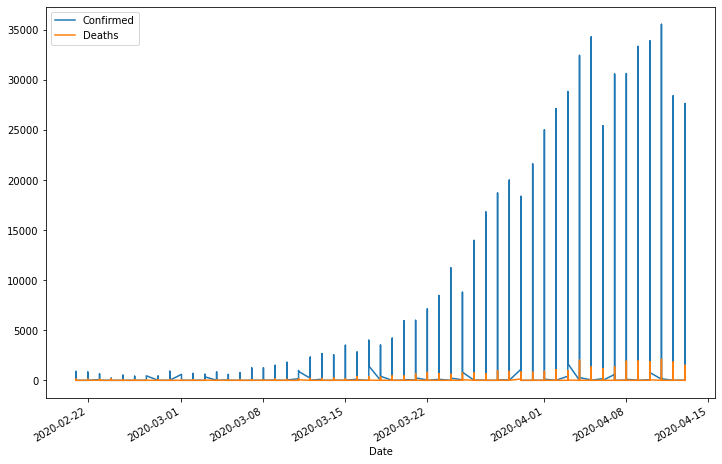

In [113]:
ndf.loc['2020-02-21':'2020-04-13'][['Confirmed','Deaths']].plot(figsize=(12,8))

In [114]:
new_data_f = ndf.copy()

In [115]:
df_by_date = new_data_f.groupby(['Date']).sum().reset_index(drop=None)

In [116]:
df_by_date

,Date,Confirmed,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
100,2020-04-09,84930,6339
101,2020-04-10,87039,7223
102,2020-04-11,89349,7049
103,2020-04-12,81707,6104


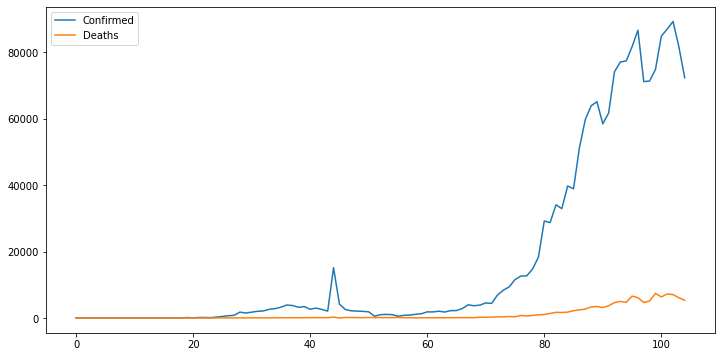

In [117]:
df_by_date[['Confirmed', 'Deaths']].plot(kind='line',figsize=(12,6))

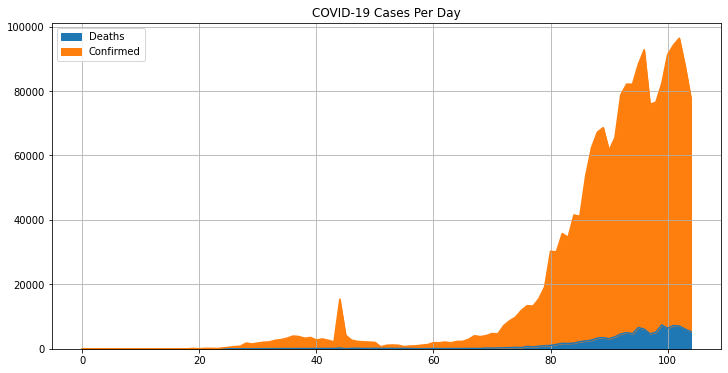

In [118]:
df_by_date[['Deaths','Confirmed']].plot(kind='area', title='COVID-19 Cases Per Day', 
                                        grid=True, figsize=(12,6))
plt.savefig('wcovid19daily22')

In [119]:
# Situation in Italy 

In [120]:
df_it.head()

,Date,Confirmed,Deaths,Country
0,2020-04-13,4092,431,Italy
1,2020-04-12,4694,619,Italy
2,2020-04-11,3951,570,Italy
3,2020-04-10,4204,612,Italy
4,2020-04-09,3836,540,Italy


In [121]:
it_ndf = df_it.copy()

In [122]:
it_ndf.head(3)

,Date,Confirmed,Deaths,Country
0,2020-04-13,4092,431,Italy
1,2020-04-12,4694,619,Italy
2,2020-04-11,3951,570,Italy


In [123]:
it_ndf.tail(3)

,Date,Confirmed,Deaths,Country
85,2020-01-19,0,0,Italy
86,2020-01-18,0,0,Italy
87,2020-01-17,0,0,Italy


In [124]:
it_ndf.set_index('Date', inplace=True)
it_ndf.sort_index(inplace=True)

In [125]:
it_ndf.head(3)

,Confirmed,Deaths,Country
Date,,,
2020-01-17,0,0,Italy
2020-01-18,0,0,Italy
2020-01-19,0,0,Italy


In [126]:
it_ndf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    1125
Deaths         29
dtype: int64

In [127]:
it_ndf.loc['2020-03-01':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    104904
Deaths        12409
dtype: int64

In [128]:
it_ndf.loc['2020-04-01':'2020-04-13'][['Confirmed','Deaths']].sum()

Confirmed    54624
Deaths        8310
dtype: int64

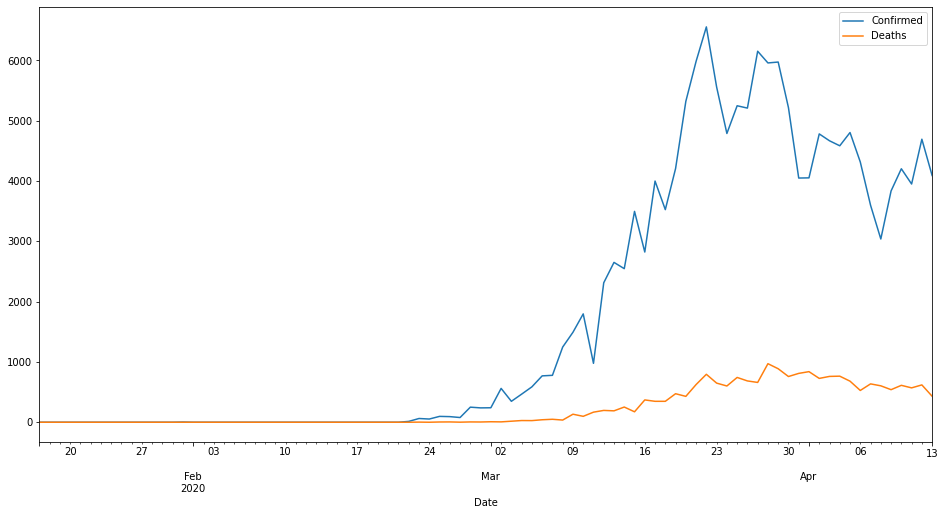

In [129]:
it_ndf.plot()

In [130]:
# Egypt State
df_eg.head()

,Date,Confirmed,Deaths,Country
0,2020-04-13,126,13,Egypt
1,2020-04-12,145,11,Egypt
2,2020-04-11,95,17,Egypt
3,2020-04-10,139,15,Egypt
4,2020-04-09,238,18,Egypt


In [131]:
eg_ndf = df_eg.copy()

In [132]:
eg_ndf.set_index('Date', inplace=True)
eg_ndf.sort_index(inplace=True)

In [133]:
eg_ndf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    1
Deaths       0
dtype: int64

In [134]:
eg_ndf.loc['2020-03-01':'2020-03-15'][['Confirmed','Deaths']].sum()

Confirmed    92
Deaths        2
dtype: int64

In [135]:
eg_ndf.loc['2020-03-15':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    563
Deaths        39
dtype: int64

In [136]:
eg_ndf.loc['2020-04-01':'2020-04-13'][['Confirmed','Deaths']].sum()

Confirmed    1456
Deaths        119
dtype: int64